<a href="https://colab.research.google.com/github/crazat/crazat.githurb.io/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%84%B1%EB%8A%A5%ED%96%A5%EC%83%81_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 타이타닉 생존자 데이터셋 다운로드 받아 구글드라이브에 올리기
    - 학습세트: https://drive.google.com/file/d/17DUdpAGVIPJ5_Cghku38YG5ugN6-SiNX/view?usp=sharing
    - 평가세트: https://drive.google.com/file/d/1ZhrzzI81mN_rFWXw68eO2a2NQ8vg8IlZ/view?usp=sharing
    - 평가세트 정답: https://drive.google.com/file/d/1kBJwGeAI1y81-gL8AAVVs4ealPHTcNNS/view?usp=sharing

- 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- 데이터 경로 변수

In [ ]:
DATA_PATH = "/content/drive/MyDrive/머신러닝/data/"
DATA_PATH

'/content/drive/MyDrive/머신러닝/data/'

- 시드값

In [ ]:
SEED = 42

- 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np

train = pd.read_csv(f"{DATA_PATH}titanic_train.csv") # 학습데이터
test = pd.read_csv(f"{DATA_PATH}titanic_test.csv") # 테스트 데이터
test_target = pd.read_csv(f"{DATA_PATH}titanic_test_target.csv") # 테스트데이터 정답값
train.shape , test.shape , test_target.shape

((916, 12), (393, 11), (393, 2))

- 결측치 확인하기

In [ ]:
train.isnull().sum()

,0
passengerid,0
survived,0
pclass,0
name,0
gender,0
age,180
sibsp,0
parch,0
ticket,0
fare,0


In [ ]:
test.isnull().sum()

,0
passengerid,0
pclass,0
name,0
gender,0
age,83
sibsp,0
parch,0
ticket,0
fare,1
cabin,308


- 학습 데이터에서 얻은 통계량을 이용하여 결측치를 채워야한다.

In [ ]:
age_mean = train["age"].mean() # 평균
fare_median = train["fare"].median() # 중앙값
cabin_unk = "UNK" # 새로운 범주
embarked_mode = train["embarked"].mode()[0] # 최빈값
age_mean , fare_median ,cabin_unk , embarked_mode

(29.904891304347824, 14.5, 'UNK', 'S')

- 학습데이터 결측치 처리

In [ ]:
train["age"] = train["age"].fillna(age_mean)
train["cabin"] = train["cabin"].fillna(cabin_unk)

- 테스트데이터 결측치 처리

In [ ]:
test["age"] = test["age"].fillna(age_mean)
test["fare"] = test["fare"].fillna(fare_median)
test["cabin"] = test["cabin"].fillna(cabin_unk)
test["embarked"] = test["embarked"].fillna(embarked_mode)

In [ ]:
train.isnull().sum().sum() , test.isnull().sum().sum()

(0, 0)

- 특성으로 사용할 변수 추가하기

In [ ]:
cols = ["age","sibsp","parch","fare","pclass","gender","embarked","cabin"]
train_ft = train[cols].copy()
test_ft = test[cols].copy() # 테스트 데이터
train_ft.shape, test_ft.shape

((916, 8), (393, 8))

- age 변수를 10으로 나눈 몫을 구해 나이대 변수 추가하기
    - 0 = 10세이하
    - 1 =  10~19세
    - 2 = 20~29세
    - ...

In [ ]:
train_ft["age_range"] = (train_ft["age"] // 10).astype(int)
test_ft["age_range"] = (test_ft["age"] // 10).astype(int)

- 타겟값 target 변수에 저장

In [ ]:
target = train["survived"]
target

,survived
0,0
1,0
2,0
3,1
4,1
...,...
911,1
912,0
913,0
914,0


# 피처들을 조합하여 새로운 범주형 피처를 만들기

In [ ]:
train_ft.head()

,age,sibsp,parch,fare,pclass,gender,embarked,cabin,age_range
0,71.0,0,0,49.5042,1,male,C,UNK,7
1,34.0,0,0,8.0500,3,male,S,UNK,3
2,29.0,3,1,22.0250,3,male,S,UNK,2
3,18.0,1,1,13.0000,2,female,S,UNK,1
4,48.0,0,0,26.5500,1,male,S,E12,4


In [ ]:
train_ft.nunique()

,0
age,88
sibsp,7
parch,8
fare,246
pclass,3
gender,2
embarked,3
cabin,146
age_range,9


In [ ]:
cols = [ "sibsp","parch" ,"pclass","gender","embarked","age_range" ]
cols

['sibsp', 'parch', 'pclass', 'gender', 'embarked', 'age_range']

In [ ]:
train_ft[cols].nunique()

,0
sibsp,7
parch,8
pclass,3
gender,2
embarked,3
age_range,9


- itertools
    - 효율적인 반복을 위한 이터레이터를 만드는 모듈

- itertools의 `combinations(iterable, n)` 함수
    - 반복가능한 객체에서 n개의 가능한 모든 조합을 튜플 형태로 꺼내준다.

In [ ]:
from itertools import combinations

for col in combinations(cols, 2):
    print(col)

('sibsp', 'parch')
('sibsp', 'pclass')
('sibsp', 'gender')
('sibsp', 'embarked')
('sibsp', 'age_range')
('parch', 'pclass')
('parch', 'gender')
('parch', 'embarked')
('parch', 'age_range')
('pclass', 'gender')
('pclass', 'embarked')
('pclass', 'age_range')
('gender', 'embarked')
('gender', 'age_range')
('embarked', 'age_range')


- 학습데이터

In [ ]:
for col in combinations(cols, 2):
    train_ft[f"{col[0]}_{col[1]}"] = train_ft[col[0]].astype(str) + "_" + train_ft[col[1]].astype(str)
train_ft.head()

,age,sibsp,parch,fare,pclass,gender,embarked,cabin,age_range,sibsp_parch,...,parch_pclass,parch_gender,parch_embarked,parch_age_range,pclass_gender,pclass_embarked,pclass_age_range,gender_embarked,gender_age_range,embarked_age_range
0,71.0,0,0,49.5042,1,male,C,UNK,7,0_0,...,0_1,0_male,0_C,0_7,1_male,1_C,1_7,male_C,male_7,C_7
1,34.0,0,0,8.0500,3,male,S,UNK,3,0_0,...,0_3,0_male,0_S,0_3,3_male,3_S,3_3,male_S,male_3,S_3
2,29.0,3,1,22.0250,3,male,S,UNK,2,3_1,...,1_3,1_male,1_S,1_2,3_male,3_S,3_2,male_S,male_2,S_2
3,18.0,1,1,13.0000,2,female,S,UNK,1,1_1,...,1_2,1_female,1_S,1_1,2_female,2_S,2_1,female_S,female_1,S_1
4,48.0,0,0,26.5500,1,male,S,E12,4,0_0,...,0_1,0_male,0_S,0_4,1_male,1_S,1_4,male_S,male_4,S_4


- 테스트 데이터

In [ ]:
for col in combinations(cols, 2):
    test_ft[f"{col[0]}_{col[1]}"] = test_ft[col[0]].astype(str) + "_" + test_ft[col[1]].astype(str)
test_ft.head()

,age,sibsp,parch,fare,pclass,gender,embarked,cabin,age_range,sibsp_parch,...,parch_pclass,parch_gender,parch_embarked,parch_age_range,pclass_gender,pclass_embarked,pclass_age_range,gender_embarked,gender_age_range,embarked_age_range
0,62.000000,0,0,26.5500,1,male,S,C87,6,0_0,...,0_1,0_male,0_S,0_6,1_male,1_S,1_6,male_S,male_6,S_6
1,28.000000,0,0,47.1000,1,male,S,UNK,2,0_0,...,0_1,0_male,0_S,0_2,1_male,1_S,1_2,male_S,male_2,S_2
2,24.000000,0,0,9.5000,3,male,S,UNK,2,0_0,...,0_3,0_male,0_S,0_2,3_male,3_S,3_2,male_S,male_2,S_2
3,29.904891,0,0,7.7333,3,female,Q,UNK,2,0_0,...,0_3,0_female,0_Q,0_2,3_female,3_Q,3_2,female_Q,female_2,Q_2
4,18.500000,0,0,7.2833,3,female,Q,UNK,1,0_0,...,0_3,0_female,0_Q,0_1,3_female,3_Q,3_1,female_Q,female_1,Q_1


# Category Encoders
- 다양한 인코딩 방식을 통해 범주형 변수를 숫자로 인코딩해주는 라이브러리
- https://contrib.scikit-learn.org/category_encoders/

- 설치하기

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


- import

In [ ]:
import category_encoders as ce

- 수치형 , 범주형 컬럼명 리스트에 담기

In [ ]:
train_ft.columns

Index(['age', 'sibsp', 'parch', 'fare', 'pclass', 'gender', 'embarked',
       'cabin', 'age_range', 'sibsp_parch', 'sibsp_pclass', 'sibsp_gender',
       'sibsp_embarked', 'sibsp_age_range', 'parch_pclass', 'parch_gender',
       'parch_embarked', 'parch_age_range', 'pclass_gender', 'pclass_embarked',
       'pclass_age_range', 'gender_embarked', 'gender_age_range',
       'embarked_age_range'],
      dtype='object')

In [ ]:
cols_num = [ 'age', 'sibsp', 'parch', 'fare', 'pclass' ]
cols_cat = [ 'gender', 'embarked',
       'cabin', 'age_range', 'sibsp_parch', 'sibsp_pclass', 'sibsp_gender',
       'sibsp_embarked', 'sibsp_age_range', 'parch_pclass', 'parch_gender',
       'parch_embarked', 'parch_age_range', 'pclass_gender', 'pclass_embarked',
       'pclass_age_range', 'gender_embarked', 'gender_age_range',
       'embarked_age_range']
len(cols_num), len(cols_cat)

(5, 19)

In [ ]:
train_ft[cols_cat].nunique()

,0
gender,2
embarked,3
cabin,146
age_range,9
sibsp_parch,25
sibsp_pclass,15
sibsp_gender,14
sibsp_embarked,14
sibsp_age_range,34
parch_pclass,16


- category_encoders로 인코딩하기 위해 카테고리 자료형으로 변환(문자열도 가능)

In [ ]:
train_ft[cols_cat] = train_ft[cols_cat].astype("category")
test_ft[cols_cat] = test_ft[cols_cat].astype("category")

## OneHotEncoder
- handle_unknown
    - 'value' 가 기본값으로 사이킷런의 'ignore' 와 동일

In [ ]:
enc = ce.one_hot.OneHotEncoder(return_df=True)
tmp = enc.fit_transform(train_ft[cols_cat])
tmp.head()

,gender_1,gender_2,embarked_1,embarked_2,embarked_3,cabin_1,cabin_2,cabin_3,cabin_4,cabin_5,...,embarked_age_range_16,embarked_age_range_17,embarked_age_range_18,embarked_age_range_19,embarked_age_range_20,embarked_age_range_21,embarked_age_range_22,embarked_age_range_23,embarked_age_range_24,embarked_age_range_25
0,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 수치형 피처와 concat
x_train = pd.concat([train_ft[cols_num],tmp],axis=1)
x_train.head()

,age,sibsp,parch,fare,pclass,gender_1,gender_2,embarked_1,embarked_2,embarked_3,...,embarked_age_range_16,embarked_age_range_17,embarked_age_range_18,embarked_age_range_19,embarked_age_range_20,embarked_age_range_21,embarked_age_range_22,embarked_age_range_23,embarked_age_range_24,embarked_age_range_25
0,71.0,0,0,49.5042,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,34.0,0,0,8.0500,3,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,29.0,3,1,22.0250,3,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,18.0,1,1,13.0000,2,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,48.0,0,0,26.5500,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

cv = KFold(n_splits=5,shuffle=True, random_state=SEED)

- 검증 결과

In [ ]:
scaler = StandardScaler()
model = LogisticRegression(random_state=SEED)
x_train = scaler.fit_transform(x_train)
scores = cross_val_score(model,x_train,target,cv = cv ,scoring='roc_auc',n_jobs = -1)
np.mean(scores) # 교차검증 결과

0.8712888246940874

## CountEncoder
- handle_unknown
    - 테스트셋에 transform할 때 새로운 범주가 나올때 인코딩할 값 지정
    - 기본적으로 nan 이 생성된다. 정수값을 넣으면 정수값으로 대체됨

In [ ]:
enc = ce.count.CountEncoder(return_df=True,handle_unknown=0)
tmp = enc.fit_transform(train_ft[cols_cat])
tmp.head()

,gender,embarked,cabin,age_range,sibsp_parch,sibsp_pclass,sibsp_gender,sibsp_embarked,sibsp_age_range,parch_pclass,parch_gender,parch_embarked,parch_age_range,pclass_gender,pclass_embarked,pclass_age_range,gender_embarked,gender_age_range,embarked_age_range
0,580,186,706,5,549,146,431,122,4,177,497,140,5,122,101,3,106,4,2
1,580,646,706,156,549,350,431,432,116,385,497,491,131,338,342,65,429,100,115
2,580,646,706,430,6,8,3,10,5,55,51,81,29,338,342,290,429,290,288
3,336,646,706,106,60,60,117,160,27,31,70,81,19,75,175,23,217,47,83
4,580,646,1,92,549,146,431,432,60,177,497,491,70,122,129,44,429,56,71


- 검증결과

In [ ]:
x_train = pd.concat([train_ft[cols_num],tmp],axis=1) # 병합

scaler = StandardScaler()
model = LogisticRegression(random_state=SEED)
x_train = scaler.fit_transform(x_train)
scores = cross_val_score(model,x_train,target,cv = cv ,scoring='roc_auc',n_jobs = -1)
np.mean(scores) # 교차검증 결과

0.8997912990101546

## BinaryEncoder
- 1부터 시작하는 정수로 범주값을 인코딩한다
- 정수를 이진수로 변경한다.


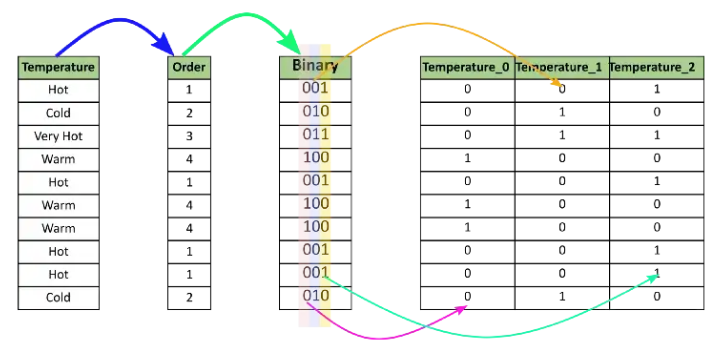

In [ ]:
enc = ce.binary.BinaryEncoder(return_df=True) # handle_unknown 기본값은 'value'
tmp = enc.fit_transform(train_ft[cols_cat])
tmp.head()

,gender_0,gender_1,embarked_0,embarked_1,cabin_0,cabin_1,cabin_2,cabin_3,cabin_4,cabin_5,...,gender_age_range_0,gender_age_range_1,gender_age_range_2,gender_age_range_3,gender_age_range_4,embarked_age_range_0,embarked_age_range_1,embarked_age_range_2,embarked_age_range_3,embarked_age_range_4
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,1
3,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1


- 검증결과

In [ ]:
x_train = pd.concat([train_ft[cols_num],tmp],axis=1) # 병합

scaler = StandardScaler()
model = LogisticRegression(random_state=SEED)
x_train = scaler.fit_transform(x_train)
scores = cross_val_score(model,x_train,target,cv = cv ,scoring='roc_auc',n_jobs = -1)
np.mean(scores) # 교차검증 결과

0.8931907999479393

- 고유값 개수가 10개 이하는 원핫 코딩 그 외는 카운트 인코딩을 해서 성능을 확인해보자

In [ ]:
train_ft[cols_cat].nunique() <= 10

,0
gender,True
embarked,True
cabin,False
age_range,True
sibsp_parch,False
sibsp_pclass,False
sibsp_gender,False
sibsp_embarked,False
sibsp_age_range,False
parch_pclass,False


In [ ]:
mask = train_ft[cols_cat].nunique() <= 10
cols1 = train_ft[cols_cat].nunique().loc[mask].index.tolist()
cols2 = train_ft[cols_cat].nunique().loc[~mask].index.tolist()
len(cols1) , len(cols2)

(6, 13)

- OneHotEncoder

In [ ]:
enc = ce.one_hot.OneHotEncoder(return_df=True)

# 학습데이터
tmp = enc.fit_transform(train_ft[cols1]).add_prefix("onehot_")
train_ft = pd.concat([train_ft,tmp],axis=1)

# 테스트데이터
tmp = enc.transform(test_ft[cols1]).add_prefix("onehot_")
test_ft = pd.concat([test_ft,tmp],axis=1)

- CountEncoder

In [ ]:
enc = ce.count.CountEncoder(return_df=True,handle_unknown=0)

# 학습데이터
tmp = enc.fit_transform(train_ft[cols2]).add_prefix("count_")
train_ft = pd.concat([train_ft,tmp],axis=1)

# 테스트데이터
tmp = enc.transform(test_ft[cols2]).add_prefix("count_")
test_ft = pd.concat([test_ft,tmp],axis=1)

- 범주형 컬럼 제거

In [ ]:
train_ft = train_ft.drop(columns = cols_cat)
test_ft = test_ft.drop(columns = cols_cat)

train_ft.shape , test_ft.shape

((916, 52), (393, 52))

- 스케일링

In [ ]:
scaler = StandardScaler()


# 학습데이터
train_ft = pd.DataFrame(
    scaler.fit_transform(train_ft),
    columns = train_ft.columns
)

# 테스트 데이터
test_ft = pd.DataFrame(
    scaler.transform(test_ft),
    columns = test_ft.columns
)

- 검증결과

In [ ]:
model = LogisticRegression(random_state=SEED)
scores = cross_val_score(model,train_ft,target,cv = cv ,scoring='roc_auc',n_jobs = -1)
np.mean(scores) # 교차검증 결과

0.9073001816349638

# Feature Selection 응용

## SelectPercentile 활용
- 가장 유의한 통계적 관계가 있는 피쳐를 퍼센트 별로 선택하여 cv 성능을 측정해서 최적의 피쳐 개수를 찾아보기
   

In [ ]:
from tqdm.auto import tqdm
from sklearn.feature_selection import SelectPercentile
cv_scores = [] # 퍼센트값과 CV 검증점수 담을 리스트
for p in tqdm(range(5,96,1)): # 5% ~ 95%
    select = SelectPercentile(percentile=p)
    select.fit(train_ft,target)
    model = LogisticRegression(random_state=SEED)
    scores = cross_val_score(model,select.transform(train_ft),target,cv = cv ,scoring='roc_auc',n_jobs = -1)
    cv_scores.append( [p,scores.mean()] ) # 퍼센트값과 CV 검증점수를 리스트에 담아 append

cv_scores = np.array(cv_scores) # ndarray로 변환
idx = np.argmax(cv_scores[:,1]) # 1번 열부분이 교차검증점수, 가장높은 점수 인덱스 반환
best_score = cv_scores[idx] # 가장높은 점수 인덱스의 퍼센트값과 교차검증점수
best_score

  0%|          | 0/91 [00:00<?, ?it/s]

array([63.        ,  0.91135084])

- 퍼센트에 따른 성능점수 추이 시각화

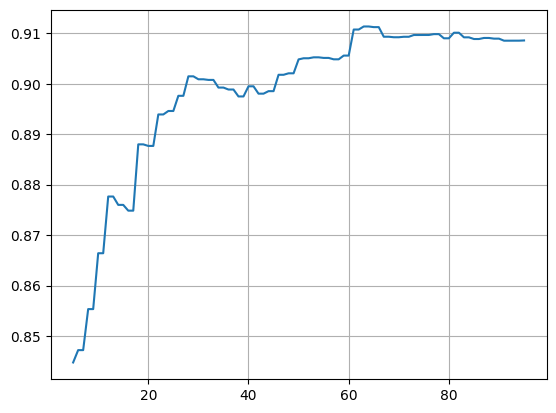

In [ ]:
import matplotlib.pyplot as plt
plt.plot(cv_scores[:,0],cv_scores[:,1]) # 퍼센트를 x축 , 성능점수를 Y축
plt.grid()
plt.show()

- 최적의 피처 변수에 저장하기

In [ ]:
select = SelectPercentile(percentile=best_score[0]) # 0번인덱스에 퍼센트값
select.fit(train_ft,target)
best_cols = select.get_feature_names_out()
best_cols

array(['fare', 'pclass', 'onehot_gender_1', 'onehot_gender_2',
       'onehot_age_range_3', 'onehot_age_range_6',
       'onehot_pclass_gender_2', 'onehot_pclass_gender_3',
       'onehot_pclass_gender_4', 'onehot_pclass_gender_5',
       'onehot_pclass_gender_6', 'onehot_pclass_embarked_1',
       'onehot_pclass_embarked_2', 'onehot_pclass_embarked_4',
       'onehot_gender_embarked_1', 'onehot_gender_embarked_2',
       'onehot_gender_embarked_3', 'onehot_gender_embarked_4',
       'onehot_gender_embarked_5', 'onehot_gender_embarked_6',
       'count_cabin', 'count_sibsp_parch', 'count_sibsp_pclass',
       'count_sibsp_gender', 'count_sibsp_embarked',
       'count_sibsp_age_range', 'count_parch_pclass',
       'count_parch_gender', 'count_parch_embarked',
       'count_parch_age_range', 'count_pclass_age_range',
       'count_gender_age_range', 'count_embarked_age_range'], dtype=object)

## 트리기반 모델의 중요도 활용
- 중요도 수치가 낮은 컬럼을 제거하면서 cv 성능을 측정해서 최적의 피쳐 개수를 찾아보기

In [ ]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(random_state=SEED)
model.fit(train_ft,target) # 학습
ft_imp = model.feature_importances_.copy() # 피처별 중요도값
ft_imp

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 346, number of negative: 570
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 916, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377729 -> initscore=-0.499198
[LightGBM] [Info] Start training from score -0.499198
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


array([ 692,   11,    9, 1044,   35,   60,    5,    0,   11,   11,    0,
          5,    6,    8,    4,    4,    5,    0,    0,    1,    9,   13,
          2,    8,   12,    2,   33,    5,    8,    0,   29,    0,    0,
          5,   17,   10,    4,    9,    0,   75,   69,   53,   18,   76,
        148,   43,   16,   89,   98,   83,   34,  120], dtype=int32)

In [ ]:
cv_scores = [] # 중요도값과 CV 검증점수 담을 리스트
for i in tqdm(range(20)): # 0 ~ 19
    mask = ft_imp > i # i 보다 큰 중요도 True
    cols = train_ft.columns[mask].tolist()
    model = LGBMClassifier(random_state=SEED)

    scores = cross_val_score(model,train_ft[cols],target,cv = cv ,scoring='roc_auc',n_jobs = -1)
    cv_scores.append([i,scores.mean()])  # 중요도값과 CV 검증점수를 리스트에 담아 append

cv_scores = np.array(cv_scores) # ndarray로 변환
idx = np.argmax(cv_scores[:,1]) # 1번 열부분이 교차검증점수, 가장높은 점수 인덱스 반환
best_score = cv_scores[idx] # 가장높은 점수 인덱스의 중요도값과 교차검증점수
best_score

  0%|          | 0/20 [00:00<?, ?it/s]

array([13.        ,  0.89813891])

- 중요도에 따른 성능점수 추이 시각화

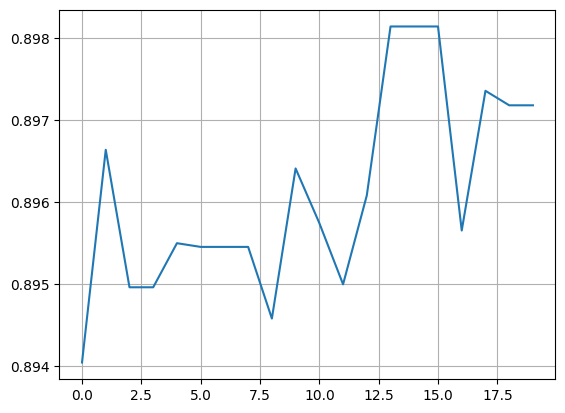

In [ ]:
plt.plot(cv_scores[:,0],cv_scores[:,1]) # 중요도값을 x축 , 성능점수를 y축
plt.grid()
plt.show()

- 최적의 피처 변수에 저장하기

In [ ]:
mask = ft_imp > best_score[0] # 0번인덱스에 중요도값
train_ft.columns[mask]

Index(['age', 'fare', 'pclass', 'onehot_gender_1', 'onehot_pclass_embarked_2',
       'onehot_pclass_embarked_6', 'onehot_gender_embarked_2', 'count_cabin',
       'count_sibsp_parch', 'count_sibsp_pclass', 'count_sibsp_gender',
       'count_sibsp_embarked', 'count_sibsp_age_range', 'count_parch_pclass',
       'count_parch_gender', 'count_parch_embarked', 'count_parch_age_range',
       'count_pclass_age_range', 'count_gender_age_range',
       'count_embarked_age_range'],
      dtype='object')

- 피처 선택하기

In [ ]:
train_ft = train_ft[best_cols]
test_ft = test_ft[best_cols]

train_ft.shape, test_ft.shape

((916, 33), (393, 33))

# Over sampling
- 클래스 불균형 문제를 해결하는 방법
- 적은 클래스에 대하여 증식을 시키는 방식
- 대표적으로 SMOTE 방식이 있다.
- imbalanced-learn 라이브러리에 SMOTE 클래스를 사용하면 된다.
- https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

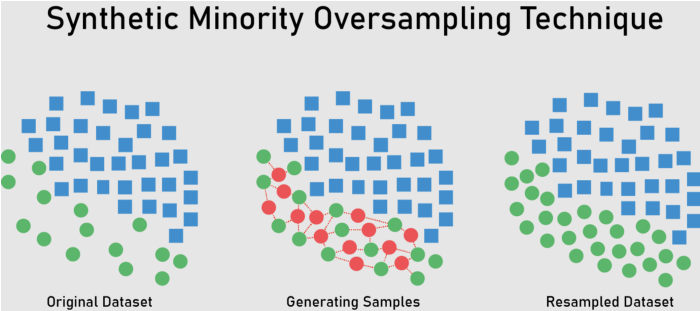

- SMOTE 클래스 주요 파라미터
    - random_state
        - 시드값
    - sampling_strategy
        - 기본값은 'auto' 이며 소수 클래스를 다수 클래스 개수에 맞춰 over sampling 한다.
        - 딕셔너리를 사용할 경우  over sampling 수를 지정할 수 있다. (key는 클래스번호, value 는 샘플수)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=SEED,k_neighbors=5)
x_train, y_train = smote.fit_resample(train_ft,target)
x_train.shape , y_train.shape

((1140, 33), (1140,))

- 오버샘플링후 1에 대한 비율

In [ ]:
target.mean() , y_train.mean()

(0.3777292576419214, 0.5)

In [ ]:
smote = SMOTE(random_state=SEED,k_neighbors=5,sampling_strategy={0:600,1:400})
x_train, y_train = smote.fit_resample(train_ft,target)
x_train.shape , y_train.shape

((1000, 33), (1000,))

- 오버샘플링후 1에 대한 비율

In [ ]:
target.mean() , y_train.mean()

(0.3777292576419214, 0.4)

- 오버샘플링을 할 때 주의해야 할 점은 검증데이터는 오버샘플링 하면 안된다. 검증데이터는 평가해야하는 대상이기 때문에 학습데이터만 샘플링해야 한다.

In [ ]:
from sklearn.metrics import roc_auc_score
scores = [] # 폴드별 검증점수 담을 리스트
for tri,vai in cv.split(train_ft):
    # 학습
    x_train = train_ft.iloc[tri]
    y_train = target.iloc[tri]

    # 검증
    x_valid = train_ft.iloc[vai]
    y_valid = target.iloc[vai]

    smote = SMOTE(random_state=SEED,k_neighbors=5)
    x_train, y_train = smote.fit_resample(x_train,y_train) # 학습데이터만 over sampling
    model = LogisticRegression(random_state=SEED)
    model.fit(x_train,y_train)
    pred = model.predict_proba(x_valid)[:,1]
    score = roc_auc_score(y_valid,pred)
    scores.append(score)
np.mean(scores) # 교차검증 결과

0.9107208810887825

# 앙상블 응용

- catboost 설치

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.0 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

- 모델 여러개 soft voting 검증 결과 보기

In [ ]:
from sklearn.ensemble import VotingClassifier
# 별칭과 모델 객체를 튜플에 담아서 리스트에 넣음
estimators = [
              ("lr",LogisticRegression(random_state=SEED)),
              ("rf",RandomForestClassifier(random_state=SEED)),
              ("xgb",XGBClassifier(random_state=SEED)),
              ("lgb",LGBMClassifier(random_state=SEED)),
              ("cat",CatBoostClassifier(random_state=SEED)),
]


params ={
    "estimators" : estimators, # 모델 담은 리스트
    "voting" : "soft" , # soft 는 각 모델의 예측확률 평균
    "n_jobs" : -1

}

model = VotingClassifier(**params)
scores = cross_val_score(model,train_ft,target,cv = cv ,scoring='roc_auc',n_jobs = -1)
np.mean(scores) # 교차검증 결과

0.9115691063177362

## 모델별로 가능한 모든 조합을 검증하여 최적에 앙상블 모델 조합 찾기

In [ ]:
best_score = 0 # 최고 점수 초기화
for i in tqdm( range(2, len(estimators)) ) : # 컴비네이션 함수에 넣을값 2~4
    for models in combinations(estimators, i):

        params ={
            "estimators" : list(models), # 모델 담은 리스트
            "voting" : "soft" , # soft 는 각 모델의 예측확률 평균
            "n_jobs" : -1
        }
        model = VotingClassifier(**params)
        scores = cross_val_score(model,train_ft,target,cv = cv ,scoring='roc_auc',n_jobs = -1)
        score = np.mean(scores)
        if best_score < score: # 현재 최고점수보다 점수가 크면..
            best_score = score # 최고 점수 갱신
            best_models = models , score # 베스트 앙상블 모델조합과 점수 갱신

        print(models , score)

  0%|          | 0/3 [00:00<?, ?it/s]

(('lr', LogisticRegression(random_state=42)), ('rf', RandomForestClassifier(random_state=42))) 0.910412816836717
(('lr', LogisticRegression(random_state=42)), ('xgb', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...))) 0.9162934291464483
(('lr', LogisticRegression(random_state=42)), ('lgb', LG

In [ ]:
best_models

((('lr', LogisticRegression(random_state=42)),
  ('xgb',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, device=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, feature_types=None,
                 gamma=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_threshold=None, max_cat_to_onehot=None,
                 max_delta_step=None, max_depth=None, max_leaves=None,
                 min_child_weight=None, missing=nan, monotone_constraints=None,
                 multi_strategy=None, n_estimators=None, n_jobs=None,
                 num_parallel_tree=None, random_state=42, ...)),
  ('cat', <catboost.core.CatBoostClassifier at 0x7a16afb13810>)),
 0.9188576485686631)

- 테스트 데이터 평가해보기

In [ ]:
params ={
    "estimators" : list(best_models[0]), # 모델 담은 리스트
    "voting" : "soft" , # soft 는 각 모델의 예측확률 평균
    "n_jobs" : -1
}

model = VotingClassifier(**params)
model.fit(train_ft,target) # 학습
y_test = test_target["survived"] # 테스트셋 y값
pred = model.predict_proba(test_ft)[:,1] # 예측
roc_auc_score(y_test,pred) # AUC 평가

0.8836183121897407

## 단일 모델에 대한 K-Fold 앙상블
- cv 개수 만큼 모델을 만들어 산술평균 하는 방법

In [ ]:
from lightgbm import early_stopping

In [ ]:
model_list = [] # 폴드별 학습된 모델 담을 리스트
score_list = [] # 폴드별 검증 점수 담을 리스트
for tri,vai in cv.split(train_ft):
    # 학습
    x_train = train_ft.iloc[tri]
    y_train = target.iloc[tri]

    # 검증
    x_valid = train_ft.iloc[vai]
    y_valid = target.iloc[vai]

    # 모델 학습
    model = LGBMClassifier(
        random_state=SEED,
        n_estimators=1000, #  부스팅수를 1000회 실시
        early_stopping_round=50 # 검증셋에 대하여 50번 연속으로 개선이 없을시 부스팅 중지
        )

    model.fit(x_train,y_train,
              eval_set = [(x_valid,y_valid)], # 부스팅단계별로 검증셋에대한 평가 실시
              )

    pred = model.predict_proba(x_valid)[:,1]
    score = roc_auc_score(y_valid,pred) # 검증셋 AUC 점수
    score_list.append(score) # 검증점수 저장
    model_list.append(model) # 학습된 모델 저장

[LightGBM] [Info] Number of positive: 276, number of negative: 456
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 374
[LightGBM] [Info] Number of data points in the train set: 732, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377049 -> initscore=-0.502092
[LightGBM] [Info] Start training from score -0.502092
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

In [ ]:
print(score_list)
np.mean(score_list) # 검증점수 평균

[0.9213032581453634, 0.937639474336722, 0.90953256302521, 0.8904943433349729, 0.9234204212210078]


0.9164780120126552

- 테스트 데이터 예측 및 평가해보기

In [ ]:
pred_list = [] # fold 별 학습된 모델의 예측을 담을 리스트
for model in model_list:
    pred = model.predict_proba(test_ft)[:,1]
    pred_list.append(pred)

In [ ]:
pred = np.mean(pred_list,axis=0) # 산술평균

In [ ]:
y_test = test_target["survived"] # 테스트셋 y값
roc_auc_score(y_test,pred) # AUC 평가

0.8888858246001102

## power mean (멱평균)

In [ ]:
p = 30.5
pred = np.array(pred_list) ** p
pred = np.mean(pred,axis=0) ** (1/p)
roc_auc_score(y_test,pred)

0.8924158852730281